<a href="https://colab.research.google.com/github/Capriel2003/TensorFlow/blob/main/DeepNetwork-fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Vérification de la disponibilité du GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Importation des bibliothèques principales
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Chargement du dataset Fashion-MNIST
from tensorflow.keras.utils import to_categorical
dataset = keras.datasets.fashion_mnist
(img_train, label_train),(img_test,label_test) = dataset.load_data()
# Conversion des images en float32 pour le réseau
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')
# Conversion des labels en vecteurs one-hot
output_train = keras.utils.to_categorical(label_train, num_classes=10)
output_test = keras.utils.to_categorical(label_test, num_classes=10)
# Vérification des dimensions
print(img_train.shape)
print(img_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Ajout d’une dimension de canal (n, 28, 28, 1)
img_train2 = np.expand_dims(img_train, axis=-1)
img_test2 = np.expand_dims(img_test, axis=-1)

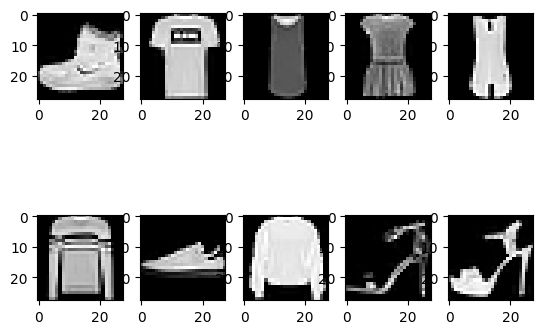

In [ ]:
# Affichage de quelques exemples d’images du dataset
for i in range(10):
 plt.subplot(2,5,i+1)
 plt.imshow(img_train[i], cmap='gray')
plt.show()

Observez le nombre de paramètres entraînables. La taille de ce réseau reste raisonnable pour un apprentissage.

Compilez votre réseau avec une fonction de coût de type CategoricalCrossEntropy et une fonction
d’optimisation Adam avec un taux d’apprentissage de 0.001 . Vous enregistrerez l’efficacité (‘accuracy’) pour
suivre l’évolution pendant l’apprentissage

Effectuez l’apprentissage de votre réseau sur le dataset d’entraînement. Effectuez 20 epochs avec une taille de
batch de 16. L’apprentissage dure environ 5 minutes, profitez-en pour souffler un peu…

Mesurez enfin les performances de votre réseau avec le dataset de test. Notez le taux de réussite du réseau

In [ ]:
# Initialisation du modèle séquentiel
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),

    # conv2D (16) + pooling
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # conv2D (32) + pooling
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # conv2D (64) (sans pooling)
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),

    # flatten + dense(512) + dense(512) + dense(10)
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

# Affichage du résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897,226 (7.24 MB)

 Trainable params: 1,897,226 (7.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle avec CategoricalCrossentropy et Adam (lr=0.001)
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
# Entraînement du modèle sur le dataset d’apprentissage (20 epochs, batch=16)
model.fit(img_train2, output_train, epochs=20, batch_size=16)

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8130 - loss: 0.6046
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8859 - loss: 0.3109
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8987 - loss: 0.2680
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9112 - loss: 0.2406
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9164 - loss: 0.2256
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9222 - loss: 0.2099
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9258 - loss: 0.1981
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9321 - loss: 0.1881
Epoch 9/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9330 - loss: 0.1825
Epoch 10/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9377 - loss: 0.1708
Epoch 11/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9433 - loss: 0.1580
Epoch 12/20
3750/37

In [ ]:
# Évaluation du modèle sur le dataset de test
model.evaluate(img_test2, output_test, batch_size=16, verbose=2)

625/625 - 2s - 4ms/step - accuracy: 0.8976 - loss: 0.5679


[0.5679426193237305, 0.897599995136261]